# Обнаружение мошенничества с кредитными картами

Выявление мошеннических финансовых операций. Компании, выпускающие кредитные карты, применяют ML для формирования решения о принятии или отклонении платежей. Хотя банки не раскрывают подробности того, как они это делают и какие данные используются для обучения их моделей, но такой набор данных был
опубликован для всеобщего пользования. Данные в нем были анонимизированы с помощью методики, называемой анализом главных компонент Principal_component_analysis (PCA). 

[dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd

df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

Данные получены из реальных транзакций, совершенных европейскими держателями кредитных карт в сентябре 2013 года. Большинство столбцов имеют неинформативные названия, например Vl и V2, и содержат такие же непрозрачные значения. Три столбца - Time (время), Amount (сумма) и Class (класс) - имеют реальные названия и неизменные значения, показывающие время проведения операции, ее сумму, а также то, была ли операция законной (Class=0) или мошеннической (Class=l).

Есть ли в этих строках пропущенные значения?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Из 284 807 транзакций в наборе данных только 492 являются мошенническими. Этот набор данных очень несбалансирован, поэтому можно ожидать, что обученная на нем МL-модель будет гораздо лучше классифицировать легитимные транзакции, чем мошеннические.

Набор данных содержит 284 807 строк, и ни в одной из них нет пропущенных значений. Разделите данные на обучающие и тестовые и с помощью параметра stratify в train_test_split убедитесь, что соотношение легитимных и мошеннических транзакций в обучающем и тестовом наборах данных одинаково:

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Обучите модель логистической регрессии разделению на классы:

In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

Обратите внимание на параметр max_iter=5000, передаваемый функции LogisticRegression. Параметр max_iter задает максимальное количество итераций. По умолчанию это значение равно 100. Увеличение значения до 5000 дает необходимый запас для поиска результата.

Обычный показатель точности, рассчитываемый путем деления суммы истинноположительных и истинноотрицательных результатов на количество тестовых образцов, не очень полезен, поскольку набор данных крайне несбалансирован. Мошеннические транзакции составляют менее 0,2% всех образцов, а это означает, что модель может просто предположить, что каждая транзакция является законной, и сделает это правильно примерно в 99,8% случаев. Для визуализации работы модели в процессе тестирования можно использовать матрицу ошибок:

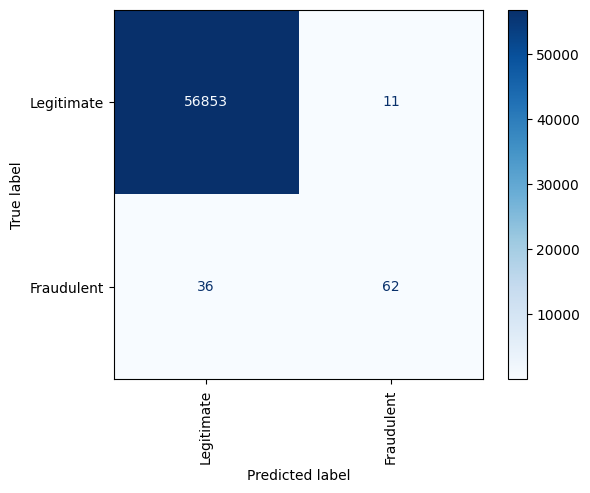

In [8]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

labels = ['Legitimate', 'Fraudulent']
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Модель логистической регрессии правильно идентифицировала 56 853 транзакции как легитимные, а ошибочно классифицировала легитимные транзакции как мошеннические всего 11 раз. Мы хотим минимизировать последнее число, поскольку не желаем раздражать клиентов отклонением законных транзакций. Посмотрим,
сможет ли классификатор со случайным лесом сделать это лучше:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Случайный лес принял за мошеннические всего 4 легитимные транзакции. Это улучшение по сравнению с логистической регрессией. Посмотрим, сможет ли классификатор с градиентным бустингом решить эту задачу еще лучше:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

cmd.from_estimator(gbm_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Модель градиентного бустинга (GBM) ошибочно классифицировала больше легитимных транзакций, чем случайный лес, поэтому мы остановимся на случайном лесе. Из 56 864 легитимных транзакций случайный лес правильно классифицировал 56 860. Это означает, что легитимные транзакции классифицируются правильно
более чем в 99,99% случаев. При этом модель уловила около 75% мошеннических транзакций.

Измерьте точность , полноту, чувствительность и специфичность классификатора случайного леса:

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred = rf_model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Учитывая стремление компаний - эмитентов кредитных карт сделать так, чтобы клиенты были довольны и тратили деньги, как вы думаете, какие из этих показателей их интересуют больше всего? Если вы ответили "специфичность", то вы ответили правильно. Специфичность - это показатель того, насколько надежен тест, не позволяющий ошибочно классифицировать отрицательный образец как положительный - в данном случае не позволяющий классифицировать легитимную транзакцию как мошенническую.

К сожалению, мы не можем делать прогнозы с помощью этой модели, поскольку не знаем значения чисел в столбцах V1-V28, и не можем сгенерировать значения столбцов из новой транзакции, поскольку не знаем примененного к исходному набору данных преобразования. 

В реальной жизни модели, которые используют компании - эмитенты кредитных карт для выявления мошенничества, более сложны, и часто включают в себя несколько моделей, поскольку ни одна из них не является на 100% точной.